A) Los siguientes datos fueron extraidos de un [perfil real de Instragram](https://www.instagram.com/paulacano24/):

https://raw.githubusercontent.com/restrepo/ComputationalMethods/master/data/Followers.json

Interprete los datos como un problema de caida libre y a partir del ajuste (fit) a la correspondiente ecuación de movimiento, determine
1. La velocidad inicial de incremento de seguidores en `followers/hour`
1. La aceleración constante en `followers/hour**2`
1. El número máximo de seguidores que alcanzaría el perfil
1. La fecha en la que se alcanzaría dicho máximo

B) El período de  un pendulo de longitud $l$ oscilando a ángulos grandes  $\alpha$, está dado por
$$
T=T_{0} \frac{\sqrt{2}}{\pi} \int_{0}^{\alpha} \frac{d \theta}{(\cos \theta-\cos \alpha)^{\frac{1}{2}}}
$$
donde
$$
T_{0}=2 \pi \sqrt{\frac{l}{g}}
$$
es el período del mismo péndulo a pequeñas amplitudes. Culquier intento de evaluación numérico de esa integral debería fallar. Sin embargo, si hacemos el cambio de variable
$$
\sin \frac{\theta}{2}=\sin \frac{\alpha}{2} \sin \phi
$$
obtenemos
$$
T=\frac{2 T_{0}}{\pi} \int_{0}^{\frac{\pi}{2}} \frac{d \phi}{\left(1-\sin ^{2} \frac{\alpha}{2} \sin ^{2} \phi\right)^{\frac{1}{2}}}
$$
que corresponde a una integral bien comportada. 
1. Escriba un programa que use la anterio integral para calcular el cociente  $T/T_0$ para ángulos enteros (en grados) $0^\circ \le\alpha \le 90^\circ$.  
1. Genere un DataFrame de pandas que contenga como columnas: la amplitud en grados, la amplitud en radianes, y el cociente $T/T_0$, 
1. Haga un gráfico de $T/T_0$ como función de $\alpha$ (en grados). 
1. Explain the result when $\alpha = 0.$ 

In [151]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize
import sympy as sp

A) Los siguientes datos fueron extraidos de un [perfil real de Instragram](https://www.instagram.com/paulacano24/):

https://raw.githubusercontent.com/restrepo/ComputationalMethods/master/data/Followers.json

Interprete los datos como un problema de caida libre y a partir del ajuste (fit) a la correspondiente ecuación de movimiento, determine
1. La velocidad inicial de incremento de seguidores en `followers/hour`
1. La aceleración constante en `followers/hour**2`
1. El número máximo de seguidores que alcanzaría el perfil
1. La fecha en la que se alcanzaría dicho máximo


In [152]:
#Se importan los datos del documento entregado en jason.
df=pd.read_json("https://raw.githubusercontent.com/restrepo/ComputationalMethods/master/data/Followers.json")
df

,followers,date_time,hours
0,42696,2021-08-04 22:06:53.668,0.000000
1,42706,2021-08-04 23:06:56.517,1.000791
2,42716,2021-08-05 00:06:59.505,2.001621
3,42734,2021-08-05 01:07:02.174,3.002363
4,42749,2021-08-05 02:07:04.854,4.003107
...,...,...,...
615,47452,2021-09-02 12:29:21.834,686.374491
616,47486,2021-09-02 19:59:32.801,693.877537
617,47491,2021-09-02 20:59:50.542,694.882465
618,47493,2021-09-02 21:59:59.345,695.884910


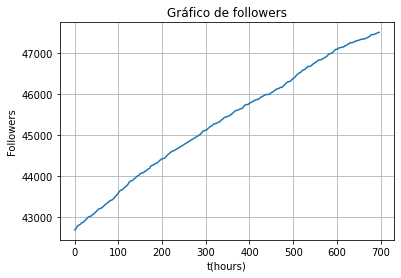

In [125]:
#Gráfico de horas vs segudiores usando los datos del data frame.
plt.plot(df['hours'],df['followers'])
plt.xlabel('t(hours)')
plt.ylabel('Followers')
plt.title('Gráfico de followers')
plt.grid()
plt.show()

In [153]:
#Se define la función para grado, interpretando los datos como una caida libre.
def cl(y,a,b,c):
  return a*y**2+b*y+c
u,v=optimize.curve_fit(cl,df['hours'],df['followers'])

In [160]:
#Se define el polinomio de grado dos.
a,b,c=u
pd=np.poly1d([a,b,c])
#Se deriva el polinomio
dp=pd.deriv()
tm=dp.roots[0] 
t=np.linspace(0,tm)

In [155]:
#Se usa la libreria simbolica para mirar la representación del polinomio de grado 2.
f=lambda t: pd[2]*t**2+pd[1]*t+pd[0]
t=sp.symbols("t")
f(t) #Polinomio

-0.00243762726282357*t**2 + 8.55213783907259*t + 42761.086006282

8.552137839072593

In [139]:
print('Velocidad inicial: %f followers/hour' %pd[1])

Velocidad inicial: 8.552138 followers/hour


In [156]:
dvf=sp.diff(f(t),t) #Derivada simbolica para encontrar la aceleración
dvf_=sp.lambdify(t, dvf, 'numpy')

In [147]:
print('Aceleración: %f followers/hour**2' %dp[1])

Aceleración: -0.004875 followers/hour**2


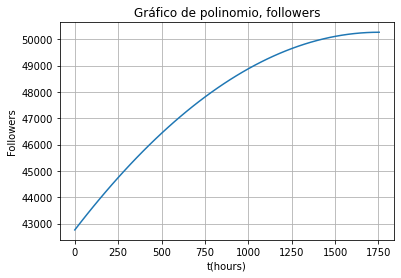

In [164]:
plt.plot(t1, cl(t,a,b,c))
plt.xlabel('t(hours)')
plt.ylabel('Followers')
plt.title('Gráfico de polinomio, followers')
plt.grid()
plt.show()

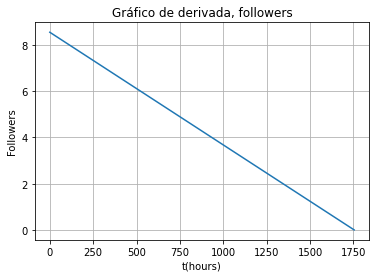

In [165]:
#Gráfico para la derivada del polinomio
plt.plot(t, dvf_(t))
plt.xlabel('t(hours)')
plt.ylabel('Followers')
plt.title('Gráfico de derivada, followers')
plt.grid()
plt.show()

In [69]:
#Se usa optimize.newton para obtener la raíz (tiempo máximo).
from scipy import optimize
root = optimize.newton(dvf_, 1800)
root

1754.1930978336766

In [166]:
print('Máximo de followers: %f ' %f(root))

Máximo de followers: 50262.136591 


In [96]:
#Usando el tiempo máximo se ecncuentra la fecha en la cual llegará al máximo de followers.
f(root)
d=root/24
d

73.09137907640319

In [171]:
print('La fecha en la que llega al máximo de followers es 73 días después del día cero (2021-08-04) + %i dias' %d)

La fecha en la que llega al máximo de followers es 73 días después del día cero (2021-08-04) + 73 dias


A) Los siguientes datos fueron extraidos de un [perfil real de Instragram](https://www.instagram.com/paulacano24/):

https://raw.githubusercontent.com/restrepo/ComputationalMethods/master/data/Followers.json

Interprete los datos como un problema de caida libre y a partir del ajuste (fit) a la correspondiente ecuación de movimiento, determine
1. La velocidad inicial de incremento de seguidores en `followers/hour`
1. La aceleración constante en `followers/hour**2`
1. El número máximo de seguidores que alcanzaría el perfil
1. La fecha en la que se alcanzaría dicho máximo

B) El período de  un pendulo de longitud $l$ oscilando a ángulos grandes  $\alpha$, está dado por
$$
T=T_{0} \frac{\sqrt{2}}{\pi} \int_{0}^{\alpha} \frac{d \theta}{(\cos \theta-\cos \alpha)^{\frac{1}{2}}}
$$
donde
$$
T_{0}=2 \pi \sqrt{\frac{l}{g}}
$$
es el período del mismo péndulo a pequeñas amplitudes. Culquier intento de evaluación numérico de esa integral debería fallar. Sin embargo, si hacemos el cambio de variable
$$
\sin \frac{\theta}{2}=\sin \frac{\alpha}{2} \sin \phi
$$
obtenemos
$$
T=\frac{2 T_{0}}{\pi} \int_{0}^{\frac{\pi}{2}} \frac{d \phi}{\left(1-\sin ^{2} \frac{\alpha}{2} \sin ^{2} \phi\right)^{\frac{1}{2}}}
$$
que corresponde a una integral bien comportada. 
1. Escriba un programa que use la anterio integral para calcular el cociente  $T/T_0$ para ángulos enteros (en grados) $0^\circ \le\alpha \le 90^\circ$.  
1. Genere un DataFrame de pandas que contenga como columnas: la amplitud en grados, la amplitud en radianes, y el cociente $T/T_0$, 
1. Haga un gráfico de $T/T_0$ como función de $\alpha$ (en grados). 
1. Explain the result when $\alpha = 0.$ 

In [127]:
#Se usa el Método de Simpson definido para encontrar los valores de las integrales.
def simpson(f,a,b,n):
    s0 = f(a)+f(b); h = (b-a)/n
    s1 = s2 = 0 
    for i in range(1,n):
        if i%2 == 0: s2 += f(a+i*h) 
        else: s1 += f(a+i*h)
    return (s0+4*s1+2*s2)*h/3
#Se define la función interna de la integral para T
f = lambda z: 1/((1-(np.sin(x/2))**2*(np.sin(z))**2))**0.5 
x = np.linspace(0,np.pi/2,12)


ec=(2/np.pi)*simpson(f,0,np.pi/2,100) #Función para T/To

In [128]:
#Se crea un data frame con los datos encontrados anteriormente.

df = pd.DataFrame()
df['Grados'] = x*180/np.pi
df['Radianes'] = x
df['T/To'] = ec

df

,Grados,Radianes,T/To
0,0.000000,0.000000,1.000000
1,8.181818,0.142800,1.001276
2,16.363636,0.285599,1.005122
3,24.545455,0.428399,1.011592
4,32.727273,0.571199,1.020781
5,40.909091,0.713998,1.032825
6,49.090909,0.856798,1.047909
7,57.272727,0.999598,1.066278
8,65.454545,1.142397,1.088244
9,73.636364,1.285197,1.114209


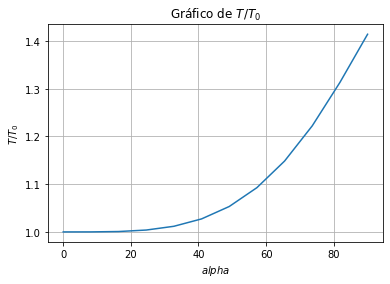

In [129]:
 #Gráfico para T/To y el intervalo de alfa.
plt.plot(x*180/np.pi,f(x))
plt.xlabel('$alpha$')
plt.ylabel('$T/T_0$')
plt.title('Gráfico de $T/T_0$')
plt.grid()
plt.show()

 **Cuando alfa toma valores cercanos a cero la integral descrita en la
ecuación toma el valor de 1, independientemente del valor de fi.
De esta manera vemos que para ángulos muy pequeños el Cociente T/T0
es aproximadamente 1, el Periodo no depende de la amplitud del péndulo
sino que únicamente de la longitud del péndulo y el valor de la gravedad.**